In [350]:
train=pd.read_csv("titanic_sub.csv")
print(train.shape)

(418, 2)


In [326]:
df=pd.DataFrame({"id":[100,200,32,34,56,65,2,4,1,2] ,"name":list("abcdefghij"),"cat":[1,0,0,1,0,1,0,0,0,0]})

In [335]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
for train,test in kf.split(df):
    print("train",train,"test",test)

train [2 3 4 5 6 7 8 9] test [0 1]
train [0 1 4 5 6 7 8 9] test [2 3]
train [0 1 2 3 6 7 8 9] test [4 5]
train [0 1 2 3 4 5 8 9] test [6 7]
train [0 1 2 3 4 5 6 7] test [8 9]


In [372]:
from sklearn.model_selection import  StratifiedKFold 
sf=StratifiedKFold(n_splits=3)
for fold_,(tra,test) in enumerate(sf.split(train.drop("PassengerId",axis=1) ,train["Survived"])):
    print("fold", fold_,"train,",len(tra),"test",len(test))

fold 0 train, 278 test 140
fold 1 train, 278 test 140
fold 2 train, 280 test 138


In [371]:
train.loc[test,"Survived"].value_counts()/len(test)

0    0.630435
1    0.369565
Name: Survived, dtype: float64

In [364]:
176/(176+104)

0.6285714285714286

In [345]:
train.head(1)

,PassengerId,Survived
0,892,0


In [377]:
from sklearn.preprocessing import PolynomialFeatures

In [782]:
train=pd.read_csv("tips.csv")
train.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [783]:
y=train["tip"]
X=train.drop("tip",axis=1)

In [784]:
X["size"]=X["size"].astype("category")
X_new=pd.get_dummies(X)
X_new.head()

,total_bill,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,16.99,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
1,10.34,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,21.01,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,23.68,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
4,24.59,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0


## Polynomial transformation

In [790]:
ply=PolynomialFeatures(degree=2 ,include_bias=False)
X_poly=ply.fit_transform(X_new)

ply.get_feature_names(X_new.columns) ## For getting names of polynomial features

X_poly_data=pd.DataFrame(X_poly,columns=ply.get_feature_names(X_new.columns))

In [794]:
X_poly_data=pd.DataFrame(X_poly,columns=ply.get_feature_names(X_new.columns))
X_poly_data.iloc[5,45:60]

sex_Female size_2       0.0
sex_Female size_3       0.0
sex_Female size_4       0.0
sex_Female size_5       0.0
sex_Female size_6       0.0
sex_Male^2              1.0
sex_Male smoker_No      1.0
sex_Male smoker_Yes     0.0
sex_Male day_Fri        0.0
sex_Male day_Sat        0.0
sex_Male day_Sun        1.0
sex_Male day_Thur       0.0
sex_Male time_Dinner    1.0
sex_Male time_Lunch     0.0
sex_Male size_1         0.0
Name: 5, dtype: float64

In [789]:
ply.get_feature_names(X_new.columns)

['total_bill',
 'sex_Female',
 'sex_Male',
 'smoker_No',
 'smoker_Yes',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'day_Thur',
 'time_Dinner',
 'time_Lunch',
 'size_1',
 'size_2',
 'size_3',
 'size_4',
 'size_5',
 'size_6',
 'total_bill^2',
 'total_bill sex_Female',
 'total_bill sex_Male',
 'total_bill smoker_No',
 'total_bill smoker_Yes',
 'total_bill day_Fri',
 'total_bill day_Sat',
 'total_bill day_Sun',
 'total_bill day_Thur',
 'total_bill time_Dinner',
 'total_bill time_Lunch',
 'total_bill size_1',
 'total_bill size_2',
 'total_bill size_3',
 'total_bill size_4',
 'total_bill size_5',
 'total_bill size_6',
 'sex_Female^2',
 'sex_Female sex_Male',
 'sex_Female smoker_No',
 'sex_Female smoker_Yes',
 'sex_Female day_Fri',
 'sex_Female day_Sat',
 'sex_Female day_Sun',
 'sex_Female day_Thur',
 'sex_Female time_Dinner',
 'sex_Female time_Lunch',
 'sex_Female size_1',
 'sex_Female size_2',
 'sex_Female size_3',
 'sex_Female size_4',
 'sex_Female size_5',
 'sex_Female size_6',
 'sex_Male^2',
 

In [554]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test = train_test_split(X_new,y,test_size=.10)

In [555]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(X_train,y_train)
print("cross_val_score",cross_val_score(lr,X_train,y_train,cv=5).mean())

cross_val_score 0.3325394083849256


In [556]:
from sklearn.linear_model import Lasso ,Ridge
m_ridge=Ridge(alpha=.06,random_state=2019)
m_ridge.fit(X_train,y_train)
print("cross_val_score",cross_val_score(m_ridge,X_train,y_train,cv=5).mean())

cross_val_score 0.3328854936958384


In [557]:
m_lasso=Lasso(alpha=.05,random_state=2019)
m_lasso.fit(X_train,y_train)
print("cross_val_score",cross_val_score(m_lasso,X_train,y_train,cv=5).mean())
print(np.sum(m_lasso.coef_))



cross_val_score 0.3690755958603399
0.12582564072591593


In [558]:
df2=pd.DataFrame({"columns":X_train.columns,"score":abs(m_ridge.coef_)})
df2.sort_values("score",ascending=True)

,columns,score
2,sex_Male,0.001466
1,sex_Female,0.001466
7,day_Sun,0.021314
15,size_5,0.045091
10,time_Lunch,0.045667
9,time_Dinner,0.045667
8,day_Thur,0.060415
6,day_Sat,0.070059
0,total_bill,0.087103
4,smoker_Yes,0.088411


In [535]:
df=pd.DataFrame({"columns":X_train.columns,"score":abs(m_lasso.coef_)})
df.sort_values("score",ascending=True)

,columns,score
2,sex_Male,0.000000e+00
6,day_Sat,0.000000e+00
7,day_Sun,0.000000e+00
4,smoker_Yes,3.738286e-16
10,time_Lunch,2.615577e-15
8,day_Thur,1.788945e-01
5,day_Fri,3.650651e-01
15,size_5,6.333083e-01
1,sex_Female,7.935380e-01
14,size_4,8.008808e-01


In [422]:
print(" intercept without regularization", lr.intercept_)
print ("coefficients without regularization ")

13.479664868952192

In [536]:
df1=pd.DataFrame({"columns":X_train.columns,"score":abs(lr.coef_)})
df1.sort_values("score",ascending=True)

,columns,score
1,sex_Female,0.469644
2,sex_Male,0.469644
5,day_Fri,0.669254
13,size_3,0.904323
6,day_Sat,1.137174
3,smoker_No,1.236407
4,smoker_Yes,1.236407
7,day_Sun,1.351491
14,size_4,2.147476
9,time_Dinner,2.696054


In [539]:
X_train.head()

,tip,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
25,2.34,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
164,3.00,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
41,2.54,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
166,2.24,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
52,5.20,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0


In [428]:
dict(zip(X_train.columns,lr.coef_))

{'day_Fri': -0.6692540899120935,
 'day_Sat': -1.1371742398439277,
 'day_Sun': -1.3514905367149763,
 'day_Thur': 3.157918866470993,
 'sex_Female': -0.469644396344151,
 'sex_Male': 0.4696443963441563,
 'size_1': -8.456533922337938,
 'size_2': -5.137194052866383,
 'size_3': -0.9043232080290999,
 'size_4': 2.1474764888925866,
 'size_5': 3.571666510371032,
 'size_6': 8.778908183969817,
 'smoker_No': -1.2364072263040535,
 'smoker_Yes': 1.236407226304056,
 'time_Dinner': 2.6960539724793056,
 'time_Lunch': -2.6960539724793064,
 'tip': 2.922362572330461}

In [394]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_=poly.fit_transform(X_new)


In [542]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [559]:
train.corr()["tip"]

total_bill    0.675734
tip           1.000000
size          0.489299
Name: tip, dtype: float64

In [566]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor(random_state=42)

In [578]:
forest_reg.fit(X_train,y_train)
cross_val_score(forest_reg,X_train,y_train,cv=5).mean()

0.3200029427134953

In [595]:
np.random.randn?

In [869]:
x=np.random.randn(100,1)
y=5+2*x+np.random.randn(100,1)

In [686]:
ln=LinearRegression()
ln.fit(x,y)
print(ln.coef_,ln.intercept_)

[[1.96938043]] [5.00245581]


In [689]:
ln.predict(x_new)

array([[5.00245581],
       [8.94121668]])

In [681]:
x1=np.array([-2.5,-2,-1,0,1.5,1.7,2])


In [673]:
plt.plot?

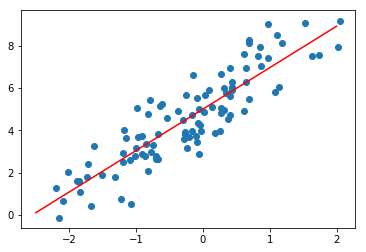

In [682]:
x=np.random.randn(100,1)
y=5+2*x+np.random.randn(100,1)

x1=np.array([-2.5,-2,-1,0,1.5,1.7,2])
plt.scatter(x=x,y=y)
plt.plot(x1,5+1.96*(x1),"b-",color="red")
plt.show()

In [799]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

ValueError: shapes (2,100) and (244,) not aligned: 100 (dim 1) != 244 (dim 0)

In [626]:
theta_best

array([[5.00245581],
       [1.96938043]])

In [688]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[x_new,np.ones((2,1))]

In [632]:
np.ones((2,1))

(2, 1)

In [654]:
x_new_b.dot(theta_best)

array([[ 1.96938043],
       [11.97429206]])

In [650]:
a = np.array([[1,2],[3,4],[1,1]]) 
b = np.array([[11,12],[13,14]]) 
np.dot(a,b)

array([[37, 40],
       [85, 92],
       [24, 26]])

(3, 2)

In [646]:
b

array([[11, 12],
       [13, 14]])

In [582]:
param_grid={'n_estimators': [30,35,40,50,60], 'max_features': [ 6, 8,10,12,14,16,17] ,"bootstrap": [True,False]}
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train,y_train)

C:\Users\GAURAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [30, 35, 40, 50, 60], 'max_features': [6, 8, 10, 12, 14, 16, 17], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [583]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 14, 'n_estimators': 50}

In [584]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [591]:
cross_val_score(grid_search.best_estimator_,X_train,y_train,cv=10).mean()

0.34229260762898694

In [587]:
pd.DataFrame({"col":X_train.columns,"importance":grid_search.best_estimator_.feature_importances_}).sort_values("importance",ascending=False)

,col,importance
0,total_bill,0.703490
12,size_2,0.042414
3,smoker_No,0.041673
4,smoker_Yes,0.033117
7,day_Sun,0.030854
6,day_Sat,0.029105
14,size_4,0.025578
16,size_6,0.015401
13,size_3,0.014596
1,sex_Female,0.012918


In [692]:
np.random.randn(2,1)

array([[ 1.19257603],
       [-1.32089877]])

### Using Batch Gradient descent , solving linear regression 

In [705]:
iteration=1000
eta=0.1
m=100
theta=np.random.randn(2,1)
for k in range(iteration):
    gradient=2/100*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta - eta*gradient
theta

array([[5.00245581],
       [1.96938043]])

## Using Stochastic Gradient descent

In [723]:
t0=5
t1=50
epoch=500
iterations=1000
def learning_schedule(t):
    return t0/(t+t1)

In [728]:
for k in range(epoch):
    for i in range(m):
        rand=np.random.randint(m)
        xi=x_b[rand:rand+1]
        yi=y[rand:rand+1]
        gradient=2* xi.T.dot(xi.dot(theta)-yi)
        lr=learning_schedule(k*m+i)
        theta=theta-(lr * gradient)
theta

array([[5.00217263],
       [1.97384291]])

In [708]:
np.random.randint(100)

42

In [731]:
sgd_clf.intercept_

array([3.53741703])

In [730]:
from sklearn.linear_model import SGDRegressor
sgd_clf = SGDRegressor(random_state=42,)
sgd_clf.fit(x, y)

C:\Users\GAURAV\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\GAURAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [772]:
x3=np.c_[x1,x2]


In [768]:
x2=3*np.random.rand(100,1)-2

In [849]:
x1=6*np.random.rand(100,1)-3
y1=.5*x1**2+ x1+np.random.rand(100,1)+2

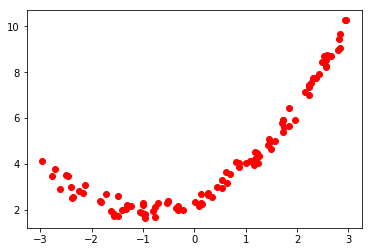

In [851]:
%matplotlib inline
plt.plot(x1,y1,"ro")

In [852]:
from sklearn.preprocessing import PolynomialFeatures
ply=PolynomialFeatures(degree=2,include_bias=False)
ply.fit(x1)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [853]:
x_poly=ply.fit_transform(x1)

In [854]:
x1[1]

array([1.95674139])

In [855]:
x_poly[1]

array([1.95674139, 3.82883688])

In [859]:
lr=LinearRegression()
lr.fit(x_poly,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [860]:
print(lr.coef_ , lr.intercept_)

[[1.00269102 0.52611888]] [2.41026235]


In [858]:
lr.intercept_

array([2.41026235])

In [846]:
-0.19514638* 3  -0.03875752  * (3**2) +4.50534906

3.5710922400000005

In [862]:
x2=[-3,-2,-1,0,1,2,3]
y2=list(map(lambda x: 1.00269102* x+ 1.00269102  * (x**2) +2.41026235,x2))
y2

[8.426408470000002,
 4.415644390000001,
 2.41026235,
 2.41026235,
 4.415644390000001,
 8.42640847,
 14.44255459]

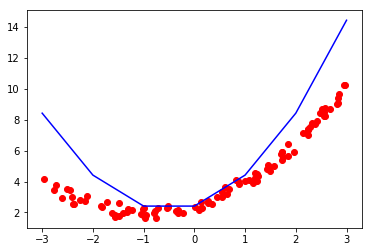

In [866]:
%matplotlib inline
#plt.figure(figsize=(12,10))
plt.plot(x1,y1,"ro")
plt.plot(x2,y2,"b-",color="b")


In [872]:
from sklearn.metrics import mean_squared_error
mean_squared_error?

In [889]:
X_train,y_train,X_test,y_test=train_test_split(x,y,test_size=0.2)
train_error ,test_error= [] ,[]
for k in range(1,len(X_train)):
    x_1=X_train[:k]
    y_1=y_train[:k]
    lr=LinearRegression()
    lr.fit(x_1,y_1)
    train_predict=lr.predict(x_1)
    test_predict=lr.predict(X_test)
    train_error.append(mean_squared_error(train_predict,y_train[:k]))
    test_error.append(mean_squared_error(test_predict,y_test))
    
    

ValueError: Found input variables with inconsistent numbers of samples: [80, 20]

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

In [69]:
train_x=iris["data"][:,3].reshape(-1,1)
train_y=iris["target"]
train_y=(train_y==2).astype(int)

In [67]:
train_x[:10]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1])

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)



C:\Users\GAURAV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
x_new=np.linspace(0,3,1000).reshape(-1,1)


In [83]:
event_1=lr.predict_proba(iris["data"][:,3:])[:,1]
event_0=lr.predict_proba(iris["data"][:,3:])[:,0]

In [76]:
len(iris["data"][:,3])

150

In [81]:
len(event_0)==len(x_new)

True

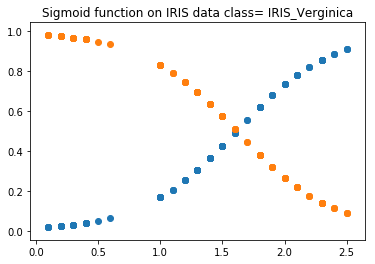

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=iris["data"][:,3],y=event_1,label="event=1")
plt.scatter(x=iris["data"][:,3] ,y=event_0 ,label="event=0")
plt.title("Sigmoid function on IRIS data class= IRIS_Verginica");

In [25]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [27]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
import numpy as np
np.min(iris["data"][:,1])

2.0

In [92]:
tr_=iris["data"][:,3]
tra_=(tr_>=1.6).astype(np.int)

In [95]:
tra_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
train_y=iris["target"]
train_y=(train_y==2).astype(int)

In [97]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
pd.crosstab(tra_,train_y,rownames=["actual"] ,colnames=["predicted"],margins=True)

predicted,0,1,All
actual,,,
0,95,3,98
1,5,47,52
All,100,50,150


In [109]:
import pandas as pd
pd.crosstab(tra_,train_y)


col_0,0,1
row_0,,
0,95,3
1,5,47


In [135]:
df1_bad_case=pd.DataFrame({"y":[1,1,1,0,0,0],"probability":[0.5,0.6,.5,.2,.3,.4]})
df1=df1_bad_case

In [117]:
df_good_case=pd.DataFrame({"y":[1,1,1,0,0,0],"probability":[0.8,0.8,.9,.2,.3,.4]})
df=df_good_case

,probability,y
0,0.8,1
1,0.8,1
2,0.9,1
3,0.2,0
4,0.3,0
5,0.4,0


In [134]:
score=0

score+=(-1/k*(df["y"] *np.log(df["probability"]) + (1-df["y"])*np.log(1-df["probability"])))
print(score)

0    0.037191
1    0.037191
2    0.017560
3    0.037191
4    0.059446
5    0.085138
dtype: float64


In [136]:
score=0

score+=(-1/k*(df1["y"] *np.log(df1["probability"]) + (1-df1["y"])*np.log(1-df1["probability"])))
print(score)
## value of score is the increase in the cost function , we are getting higher score for
##class y=1 and probability=0.6 then class y=1 and probability=0.8 ,so the function is getting penalized for
## predicted correct class with lower confidence.

0    0.115525
1    0.085138
2    0.115525
3    0.037191
4    0.059446
5    0.085138
dtype: float64
